# Filter Bubbles

Filter Bubbles refer to the phenomenon wherein individuals are increasingly
exposed to information and perspectives that align with their existing beliefs,
preferences, and interests, while being shielded from contradictory or diverse
viewpoints. In the context of news media aggregators, such as online plat-
forms and social media networks, algorithms curate and prioritize content
based on user-specific data, including past behaviors, interactions, and de-
mographic information. As a result, users are presented with a personalized
stream of news and information that reinforces their preconceptions, limits
exposure to alternative viewpoints, and may contribute to the polarization
of societal discourse.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

The matrix reflects: in the rows, the topics. in the columns, the users (+ the last column, which is the Home column). The numbers in the matrix are the number of news of topic i that user j has encountered on the homepage.

In [18]:
americanNews_matrix = np.array([[1, 2, 1, 0, 0, 0, 0, 0, 0],
                                [2, 1, 3, 1, 0, 0, 0, 0, 4],
                                [0, 0, 2, 3, 0, 0, 0, 0, 2],
                                [0, 0, 0, 0, 6, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 8, 0, 0, 0],
                                [0, 0, 0, 0, 0, 1, 8, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 3, 0],
                                [0, 0, 0, 0, 0, 0, 0, 5, 0],
                                [7, 0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 7, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 4, 2, 0, 1, 0, 2, 0],
                                [0, 0, 0, 4, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 4, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 2, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0, 2]])

In [19]:
indianNews_matrix = np.array([[3, 3, 1, 0, 2, 3, 3, 0, 0, 0, 1],
                              [1, 2, 4, 4, 1, 0, 0, 0, 0, 0, 4],
                              [2, 1, 1, 0, 2, 5, 3, 0, 0, 0, 2],
                              [4, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0],
                              [0, 4, 0, 6, 1, 0, 0, 10, 0, 0, 0],
                              [0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 3],
                              [0, 0, 0, 0, 0, 0, 0, 0, 10, 2, 0],
                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0]])

### Click-through rate (CTR)

CTR (Click-Through Rate) is a metric that measures **the percentage of clicks on recommended articles compared to the total number of recommended articles**.

- Original CTR: In the original paper, the CTR (Click-Through Rate) is calculated as **the fraction of recommended articles (N) that the user clicks on (ri = 1)**. **The sum of clicks on recommended items is divided by the total number of recommended items (N items)**.

- Our CTR: *calculate_custom_CTR* calculates a CTR-like metric based on the matrix. The metric represents **the fraction of views in the "Home" column compared to total views**. This metric takes into account article views on the homepage.

In the original paper, CTR is defined as the fraction of recommended articles that the user clicks on, which represents specific user behavior towards recommended content.

In our case, we are trying to similarly evaluate how much users view content from a certain topic on the homepage, but without considering actual clicks. So, while the approach is similar in that they both seek to measure user interaction with recommended content, there are key differences in defining the metrics.

In [4]:
# Definisci una funzione per calcolare il CTR
def calculate_CTR(matrix):
    # Calcola la somma delle visualizzazioni nella matrice
    total_views = np.sum(matrix)
    
    # Calcola la somma delle visualizzazioni nella colonna "Home" (ultima colonna)
    home_views = np.sum(matrix[:, -1])
    
    # Calcola la metrica come la frazione di visualizzazioni nella colonna "Home"
    CTR = home_views / total_views
    
    return CTR

# Calcola il CTR
ctr = calculate_CTR(matrix)
print("Click-Through Rate (CTR):", ctr)

Click-Through Rate (CTR): 0.09090909090909091


Our Click-Through Rate (CTR) result is 0.09090909090909091, which represents the percentage of homepage article views compared to total views. In other words, approximately 8.33% of homepage views had a click or similar interaction.

### Average Document Stance

- Original Average document stance is the **average partisan score of the articles that are shown to the users**.

- Our Average document stance: *calculate_average_document_stance* takes **the topic array and index as input and calculates the average document stance for that specific topic**. This function calculates the average of the partisan scores for the topic, excluding zero values in the average.

In [6]:
def calculate_average_document_stance(matrix, topic_index):
    # Estrai la riga corrispondente al topic
    topic_row = matrix[topic_index - 1]  # Sottrai 1 perché gli indici partono da 0
    
    # Calcola la somma dei punteggi per il topic
    total_score = np.sum(topic_row)
    
    # Calcola l'average document stance
    avg_stance = total_score / np.sum(topic_row != 0)  # Calcola la media solo sui valori non zero
    
    return avg_stance

# Calcola l'average document stance per i tre topic: repubblicano, democratico, neutrale
avg_stance_repubblicano = calculate_average_document_stance(matrix, 1)  # Topic repubblicano
avg_stance_democratico = calculate_average_document_stance(matrix, 2)   # Topic democratico
avg_stance_neutrale = calculate_average_document_stance(matrix, 3)      # Topic neutrale

print("Average Document Stance per il topic Repubblicano:", avg_stance_repubblicano)
print("Average Document Stance per il topic Democratico:", avg_stance_democratico)
print("Average Document Stance per il topic Neutrale:", avg_stance_neutrale)

Average Document Stance per il topic Repubblicano: 1.3333333333333333
Average Document Stance per il topic Democratico: 2.2
Average Document Stance per il topic Neutrale: 2.3333333333333335


These results represent the average position of articles shown to users for each topic. For example, for the Republican topic, the average document stance is approximately 1.33, while for the Democratic topic it is approximately 2.2, and for the neutral topic it is approximately 2.33. These scores indicate the average positions of recommended articles in each topic, but remember that these values are specific to your display matrix and may vary based on actual data and user preferences.

### Average News Document Stance 

In [20]:
def calculate_american_scores(matrix):
    # Estrai le prime tre righe (republican, democratic, neutral)
    topics = matrix[:3]

    # Inizializza una lista per gli utenti
    users = []

    # Calcola i punteggi per ciascun utente
    for user_index in range(matrix.shape[1]):
        user = {}
        user['User'] = user_index + 1  # Per l'utente n, inizia da 1
        for topic_index, topic in enumerate(topics):
            topic_name = ''
            if topic_index == 0:
                topic_name = 'rep'
            elif topic_index == 1:
                topic_name = 'dem'
            else:
                topic_name = 'neu'
            
            user[f'{topic_name} score'] = topic[user_index] / sum(topic)
        
        users.append(user)

    return users

In [21]:
americanUser_scores = calculate_american_scores(americanNews_matrix)

# Stampa i risultati
for user in americanUser_scores:
    print(f"U{user['User']}:")
    for topic in ['rep', 'dem', 'neu']:
        print(f"{topic} score: {user[f'{topic} score']:.2f}")

U1:
rep score: 0.25
dem score: 0.18
neu score: 0.00
U2:
rep score: 0.50
dem score: 0.09
neu score: 0.00
U3:
rep score: 0.25
dem score: 0.27
neu score: 0.29
U4:
rep score: 0.00
dem score: 0.09
neu score: 0.43
U5:
rep score: 0.00
dem score: 0.00
neu score: 0.00
U6:
rep score: 0.00
dem score: 0.00
neu score: 0.00
U7:
rep score: 0.00
dem score: 0.00
neu score: 0.00
U8:
rep score: 0.00
dem score: 0.00
neu score: 0.00
U9:
rep score: 0.00
dem score: 0.36
neu score: 0.29


In [22]:
def calculate_indian_scores(matrix):
    # Estrai le prime tre righe (republican, democratic, neutral)
    topics = matrix[:3]

    # Inizializza una lista per gli utenti
    users = []

    # Calcola i punteggi per ciascun utente
    for user_index in range(matrix.shape[1]):
        user = {}
        user['User'] = user_index + 1  # Per l'utente n, inizia da 1
        for topic_index, topic in enumerate(topics):
            topic_name = ''
            if topic_index == 0:
                topic_name = 'gov'
            elif topic_index == 1:
                topic_name = 'opp'
            else:
                topic_name = 'neu'
            
            user[f'{topic_name} score'] = topic[user_index] / sum(topic)
        
        users.append(user)

    return users

In [23]:
indianUser_scores = calculate_indian_scores(indianNews_matrix)

# Stampa i risultati con nomi utente personalizzati
for user_index, user in enumerate(indianUser_scores, start=11):
    user_name = f"I{user_index}"
    print(f"{user_name}:")
    for topic in ['gov', 'opp', 'neu']:
        print(f"{topic} score: {user[f'{topic} score']:.2f}")


I11:
gov score: 0.19
opp score: 0.06
neu score: 0.12
I12:
gov score: 0.19
opp score: 0.12
neu score: 0.06
I13:
gov score: 0.06
opp score: 0.25
neu score: 0.06
I14:
gov score: 0.00
opp score: 0.25
neu score: 0.00
I15:
gov score: 0.12
opp score: 0.06
neu score: 0.12
I16:
gov score: 0.19
opp score: 0.00
neu score: 0.31
I17:
gov score: 0.19
opp score: 0.00
neu score: 0.19
I18:
gov score: 0.00
opp score: 0.00
neu score: 0.00
I19:
gov score: 0.00
opp score: 0.00
neu score: 0.00
I20:
gov score: 0.00
opp score: 0.00
neu score: 0.00
I21:
gov score: 0.06
opp score: 0.25
neu score: 0.12


### Normalized document stance

- Original Normalized document stance: they represent the fraction of articles that are shown to the users who have stance i. Normalized stance entropy is the entropy of this distribution,
normalized by log m so that its maximum is 1, where m = 5 in their case (representing the five political stances).

- Our Normalized document stance: *calculate_normalized_stance_entropy* takes the matrix and the value of m (in our case, 3) as input and **calculates the normalized position entropy based on the fractions of articles shown to users for each of the three positions**.

In [6]:
# Definisci una funzione per calcolare l'entropia di posizione normalizzata
def calculate_normalized_stance_entropy(matrix, m):
    # Calcola le frazioni di articoli mostrati agli utenti per ciascuna posizione
    position_fractions = np.sum(matrix, axis=1) / np.sum(matrix)
    
    # Calcola l'entropia della distribuzione
    entropy = -np.sum(position_fractions * np.log(position_fractions)) / np.log(m)
    
    return entropy

# Valore di m (numero di posizioni)
m = 3

# Calcola l'entropia di posizione normalizzata con m = 3
normalized_stance_entropy = calculate_normalized_stance_entropy(matrix, m)
print("Normalized Stance Entropy:", normalized_stance_entropy)

Normalized Stance Entropy: 2.369491306537947


This metric represents the diversity of item locations recommended to users. A higher entropy value indicates greater diversity in the positions of recommended items. In this case, a value of 2.369491306537947 suggests some diversity in item positions.

### Entropy (new)

for the entropy based 3 features, just generate for every user.

In [9]:
def calculate_american_user_entropy(matrix):
    users = []

    # iterate through columns
    for user_index in range(matrix.shape[1]):
        user = {}
        user['User'] = user_index + 1  

        # extracts value in row 0, 1 and 2 of user_index column
        rep = matrix[0, user_index]
        dem = matrix[1, user_index]
        neu = matrix[2, user_index]

        total = rep + dem + neu
        if total == 0:
            entropy = 0  # avoid division by zero
        else:
            rep_frac = rep / total
            dem_frac = dem / total
            neu_frac = neu / total

            if(rep_frac != 0):
                rep_var = -rep_frac * np.log(rep_frac)
            else:
                rep_var = 0
            if(dem_frac != 0): 
                dem_var = - dem_frac * np.log(dem_frac)
            else:
                dem_var = 0
            if(neu_frac != 0):  
                neu_var = - neu_frac * np.log(neu_frac)
            else:
                neu_var = 0
                
            if(not(math.isnan(rep_var)) and not(math.isnan(dem_var)) and not(math.isnan(neu_var))):
                entropy = rep_var + dem_var + neu_var

        user['rep'] = rep_var
        user['dem'] = dem_var
        user['neu'] = neu_var
        users.append(user)

    return users

In [10]:
american_user_entropies = calculate_american_user_entropy(americanNews_matrix)

for user in american_user_entropies:
    print(f"Rep for User U{user['User']}: {user['rep']:.2f}")
    print(f"Dem for User U{user['User']}: {user['dem']:.2f}")
    print(f"Neu for User U{user['User']}: {user['neu']:.2f}")
    print("==========================================")

Rep for User U1: 0.37
Dem for User U1: 0.27
Neu for User U1: 0.00
Rep for User U2: 0.27
Dem for User U2: 0.37
Neu for User U2: 0.00
Rep for User U3: 0.30
Dem for User U3: 0.35
Neu for User U3: 0.37
Rep for User U4: 0.00
Dem for User U4: 0.35
Neu for User U4: 0.22
Rep for User U5: 0.00
Dem for User U5: 0.35
Neu for User U5: 0.22
Rep for User U6: 0.00
Dem for User U6: 0.35
Neu for User U6: 0.22
Rep for User U7: 0.00
Dem for User U7: 0.35
Neu for User U7: 0.22
Rep for User U8: 0.00
Dem for User U8: 0.35
Neu for User U8: 0.22
Rep for User U9: 0.00
Dem for User U9: 0.27
Neu for User U9: 0.37


In [11]:
def calculate_indian_user_entropy(matrix):
    users = []

    # iterate through columns
    for user_index in range(matrix.shape[1]):
        user = {}
        user['User'] = user_index + 1  

        # extracts value in row 0, 1 and 2 of user_index column
        gov = matrix[0, user_index]
        opp = matrix[1, user_index]
        neu = matrix[2, user_index]

        total = gov + opp + neu
        if total == 0:
            entropy = 0  # avoid division by zero
        else:
            gov_frac = gov / total
            opp_frac = opp / total
            neu_frac = neu / total

            if(gov_frac != 0):
                gov_var = -gov_frac * np.log(gov_frac)
            else:
                gov_var = 0
            if(opp_frac != 0): 
                opp_var = - opp_frac * np.log(opp_frac)
            else:
                opp_var = 0
            if(neu_frac != 0):  
                neu_var = - neu_frac * np.log(neu_frac)
            else:
                neu_var = 0
                
            if(not(math.isnan(gov_var)) and not(math.isnan(opp_var)) and not(math.isnan(neu_var))):
                entropy = gov_var + opp_var + neu_var

        user['gov'] = gov_var
        user['opp'] = opp_var
        user['neu'] = neu_var
        users.append(user)

    return users

In [12]:
indian_user_entropies = calculate_indian_user_entropy(indianNews_matrix)

# Stampa i risultati con nomi utente personalizzati
for user_index, user in enumerate(indian_user_entropies, start=11):
    user_name = f"I{user_index}"
    print(f"Gov for User {user_name}: {user['gov']:.2f}")
    print(f"Opp for User {user_name}: {user['opp']:.2f}")
    print(f"Neu for User {user_name}: {user['neu']:.2f}")
    print("==========================================")


Gov for User I11: 0.35
Opp for User I11: 0.30
Neu for User I11: 0.37
Gov for User I12: 0.35
Opp for User I12: 0.37
Neu for User I12: 0.30
Gov for User I13: 0.30
Opp for User I13: 0.27
Neu for User I13: 0.30
Gov for User I14: 0.00
Opp for User I14: -0.00
Neu for User I14: 0.00
Gov for User I15: 0.37
Opp for User I15: 0.32
Neu for User I15: 0.37
Gov for User I16: 0.37
Opp for User I16: 0.00
Neu for User I16: 0.29
Gov for User I17: 0.35
Opp for User I17: 0.00
Neu for User I17: 0.35
Gov for User I18: 0.35
Opp for User I18: 0.00
Neu for User I18: 0.35
Gov for User I19: 0.35
Opp for User I19: 0.00
Neu for User I19: 0.35
Gov for User I20: 0.35
Opp for User I20: 0.00
Neu for User I20: 0.35
Gov for User I21: 0.28
Opp for User I21: 0.32
Neu for User I21: 0.36


### Normalized topic entropy

- Original Normalized topic entropy: similar to normalized stance entropy, they measure the
diversity of topics. This provides a measure of topical diversity, in addition to stance diversity above. The metric is the same as Equation 3, where pi is instead the probability of articles having topic i in a sequence of recommendations, and m = 14 since there are 14 topics.

- Our Normalized topic entropy: c*alculate_normalized_topic_entropy* takes the matrix and the value of m (in your case, 15, as 15 total topics) as input and **calculates the normalized topic entropy based on the fractions of articles that have each topic in a recommendation sequence**.

In [11]:
# Definisci una funzione per calcolare l'entropia dell'argomento normalizzata
def calculate_normalized_topic_entropy(matrix, m):
    # Calcola le frazioni di articoli che hanno ciascun argomento in una sequenza di raccomandazioni
    topic_fractions = np.sum(matrix, axis=0) / np.sum(matrix)
    
    # Calcola l'entropia della distribuzione
    entropy = -np.sum(topic_fractions * np.log(topic_fractions)) / np.log(m)
    
    return entropy

# Calcola l'entropia dell'argomento normalizzata con m = 15
m = 15
normalized_topic_entropy = calculate_normalized_topic_entropy(matrix, m)
print("Normalized Topic Entropy:", normalized_topic_entropy)

Normalized Topic Entropy: 0.8105601210727017


This metric represents the diversity of article topics recommended to users. A higher entropy value indicates a greater diversity of recommended content topics. In this case, a value of 0.8105601210727017 suggests some diversity in recommended article topics.

### Saving files

In [24]:
def save_scores_to_csv(scores, entropies, file_name):
    with open(file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Scrivi la prima riga con l'intestazione per gli scores
        header = ["Average news document stance"]
        writer.writerow(header)
        
        # Scrivi la tabella degli scores
        user_names = [f"U{i}" for i in range(1, len(scores))] + ["home"]  # Aggiungi "home" all'elenco degli utenti
        writer.writerow([""] + user_names)  # Intestazione utenti
        
        for topic in ['rep', 'dem', 'neu']:
            row = [f"{topic} score"]
            for user in scores:
                row.extend([round(user[f'{topic} score'], 2)])  # Utilizza round() per formattare a due decimali
            writer.writerow(row)
        
        # Aggiungi una riga vuota
        writer.writerow([])
        
        # Scrivi la prima riga per l'entropia
        writer.writerow(["Entropy user scores"])
        writer.writerow([""] + user_names)  # Intestazione utenti
        
        # Scrivi la tabella delle entropie
        for topic in ['rep', 'dem', 'neu']:
            row = [f"{topic} score"]
            for user in entropies:
                row.extend([round(user[f'{topic}'], 2)])  # Utilizza round() per formattare a due decimali
            writer.writerow(row)

save_scores_to_csv(americanUser_scores, american_user_entropies, 'american_news_scores.csv')


In [25]:
def save_indian_scores_to_csv(scores, entropies, file_name):
    with open(file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Scrivi la prima riga con l'intestazione per gli scores
        header = ["Average news document stance"]
        writer.writerow(header)
        
        # Scrivi la tabella degli scores
        user_names = [f"I{user_index}" for user_index in range(11, 21)] + ["home"]  # Aggiungi "home" all'elenco degli utenti
        writer.writerow([""] + user_names)  # Nomi utenti personalizzati
        
        for topic in ['gov', 'opp', 'neu']:
            row = [f"{topic} score"]
            for user in scores:
                row.extend([round(user[f'{topic} score'], 2)])
            writer.writerow(row)
        
        # Aggiungi una riga vuota
        writer.writerow([])
        
        # Scrivi la prima riga per l'entropia
        writer.writerow(["Entropy user scores"])
        writer.writerow([""] + user_names)  # Nomi utenti personalizzati
        
        # Scrivi la tabella delle entropie
        for topic in ['gov', 'opp', 'neu']:
            row = [f"{topic} score"]
            for user in entropies:
                row.extend([round(user[f'{topic}'], 2)])
            writer.writerow(row)

save_indian_scores_to_csv(indianUser_scores, indian_user_entropies, 'indian_news_scores.csv')


### Graph Plot

In [16]:
# Dati dei punteggi rep score, dem score e neu score per gli utenti
average_rep = [0.25, 0.5, 0.25, 0, 0, 0, 0, 0, 0]
average_dem = [0.18, 0.09, 0.27, 0.09, 0, 0, 0, 0, 0.36]
average_neu = [0, 0, 0.29, 0.43, 0, 0, 0, 0, 0.29]
average_users = [f'U{i+1}' for i in range(len(average_rep))]
average_users[-1] = 'Home'

# Imposta lo stesso intervallo y in tutti i subplot
y_max = max(max(average_rep), max(average_dem), max(average_neu))
plt_range = (0, y_max)  # Imposta il range y

# Creazione dei bar plot
plt.figure(figsize=(15, 6))

plt.subplot(131)  # 1 riga, 3 colonne, primo plot
plt.bar(average_users, average_rep, color='r', alpha=1.0)
plt.title('Republican Score')
plt.xlabel('Users')
plt.ylabel('Average News Document Stance Score')
plt.ylim(plt_range)  # Imposta l'intervallo y
plt.savefig('plots/american/avg/american_average_news_document_stance_rep.eps', format='eps', bbox_inches='tight', pad_inches=0.1)
plt.clf()  

plt.subplot(132)  # 1 riga, 3 colonne, secondo plot
plt.bar(average_users, average_dem, color='b', alpha=1.0)
plt.title('Democratic Score')
plt.xlabel('Users')
plt.ylabel('Average News Document Stance Score')
plt.ylim(plt_range)  # Imposta l'intervallo y
plt.savefig('plots/american/avg/american_average_news_document_stance_dem.eps', format='eps', bbox_inches='tight', pad_inches=0.1)
plt.clf()  

plt.subplot(133)  # 1 riga, 3 colonne, terzo plot
plt.bar(average_users, average_neu, color='g', alpha=1.0)
plt.title('Neutral Score')
plt.xlabel('Users')
plt.ylabel('Average News Document Stance Score')
plt.ylim(plt_range)  # Imposta l'intervallo y
plt.savefig('plots/american/avg/american_average_news_document_stance_neu.eps', format='eps', bbox_inches='tight', pad_inches=0.1)
plt.clf()  

plt.tight_layout()  # Ottimizza il layout dei plot
plt.show()


<Figure size 1500x600 with 0 Axes>

In [17]:
# Dati degli Entropy User Scores per "rep score," "dem score," e "neu score" degli utenti
entropy_rep = [0.37, 0.27, 0.3, 0, 0, 0, 0, 0, 0]
entropy_dem = [0.27, 0.37, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.27]
entropy_neu = [0, 0, 0.37, 0.22, 0.22, 0.22, 0.22, 0.22, 0.37]
entropy_users = [f'U{i+1}' for i in range(len(entropy_rep))]
entropy_users[-1] = 'Home'  

# Creazione dei bar plot per Entropy User Scores con una figura più ampia
plt.figure(figsize=(15, 6))  # Aumenta la larghezza della figura

plt.subplot(131)  # 1 riga, 3 colonne, primo plot
plt.bar(entropy_users, entropy_rep, color='r', alpha=1.0)
plt.title('Entropy Republican Score')
plt.xlabel('Users')
plt.ylabel('Entropy Score')
plt.savefig('plots/american/entropy/american_entropy_rep.eps', format='eps', bbox_inches='tight', pad_inches=0.1)
plt.clf()  

plt.subplot(132)  # 1 riga, 3 colonne, secondo plot
plt.bar(entropy_users, entropy_dem, color='b', alpha=1.0)
plt.title('Entropy Democratic Score')
plt.xlabel('Users')
plt.ylabel('Entropy Score')
plt.savefig('plots/american/entropy/american_entropy_dem.eps', format='eps', bbox_inches='tight', pad_inches=0.1)
plt.clf()  

plt.subplot(133)  # 1 riga, 3 colonne, terzo plot
plt.bar(entropy_users, entropy_neu, color='g', alpha=1.0)
plt.title('Entropy Neutral Score')
plt.xlabel('Users')
plt.ylabel('Entropy Score')
plt.savefig('plots/american/entropy/american_entropy_neu.eps', format='eps', bbox_inches='tight', pad_inches=0.1)
plt.clf()  

plt.tight_layout()  # Ottimizza il layout dei plot
plt.show()


<Figure size 1500x600 with 0 Axes>

In [18]:
# Dati dei punteggi rep score, dem score e neu score per gli utenti
average_gov = [0.19, 0.19, 0.06, 0, 0.12, 0.19, 0.19, 0, 0, 0, 0.06]
average_opp = [0.06, 0.12, 0.25, 0.25, 0.6, 0, 0, 0, 0, 0, 0.25]
average_neu = [0.12, 0.06, 0.06, 0, 0.12, 0.31, 0.19, 0, 0, 0, 0.12]
average_indian_users = [f'I{i+11}' for i in range(len(average_gov))]
average_indian_users[-1] = 'Home'

# Imposta lo stesso intervallo y in tutti i subplot
y_max = max(max(average_gov), max(average_opp), max(average_neu))
plt_range = (0, y_max)  # Imposta il range y

# Creazione dei bar plot
plt.figure(figsize=(15, 6))

plt.subplot(131)  # 1 riga, 3 colonne, primo plot
plt.bar(average_indian_users, average_gov, color='r', alpha=1.0)
plt.title('Government Score')
plt.xlabel('Users')
plt.ylabel('Average News Document Stance Score')
plt.ylim(plt_range)  # Imposta l'intervallo y
plt.savefig('plots/indian/avg/indian_average_news_document_stance_gov.eps', format='eps', bbox_inches='tight', pad_inches=0.1)
plt.clf()  

plt.subplot(132)  # 1 riga, 3 colonne, secondo plot
plt.bar(average_indian_users, average_opp, color='b', alpha=1.0)
plt.title('Opposition Score')
plt.xlabel('Users')
plt.ylabel('Average News Document Stance Score')
plt.ylim(plt_range)  # Imposta l'intervallo y
plt.savefig('plots/indian/avg/indian_average_news_document_stance_opp.eps', format='eps', bbox_inches='tight', pad_inches=0.1)
plt.clf()  

plt.subplot(133)  # 1 riga, 3 colonne, terzo plot
plt.bar(average_indian_users, average_neu, color='g', alpha=1.0)
plt.title('Neutral Score')
plt.xlabel('Users')
plt.ylabel('Average News Document Stance Score')
plt.ylim(plt_range)  # Imposta l'intervallo y
plt.savefig('plots/indian/avg/indian_average_news_document_stance_neu.eps', format='eps', bbox_inches='tight', pad_inches=0.1)
plt.clf()  

plt.tight_layout()  # Ottimizza il layout dei plot
plt.show()


<Figure size 1500x600 with 0 Axes>

In [19]:
# Dati degli Entropy User Scores per "rep score," "dem score," e "neu score" degli utenti
entropy_gov = [0.35, 0.35, 0.3, 0, 0.37, 0.37, 0.35, 0.35, 0.35, 0.35, 0.28]
entropy_opp = [0.3, 0.37, 0.27, 0, 0.32, 0, 0, 0, 0, 0, 0.32]
entropy_neu = [0.37, 0.3, 0.3, 0, 0.37, 0.29, 0.35, 0.35, 0.35, 0.35, 0.36]

entropy_indian_users = [f'I{i+11}' for i in range(len(entropy_gov))]
entropy_indian_users[-1] = 'Home'  

# Creazione dei bar plot per Entropy User Scores con una figura più ampia
plt.figure(figsize=(15, 6))  # Aumenta la larghezza della figura

plt.subplot(131)  # 1 riga, 3 colonne, primo plot
plt.bar(entropy_indian_users, entropy_gov, color='r', alpha=1.0)
plt.title('Entropy Government Score')
plt.xlabel('Users')
plt.ylabel('Entropy Score')
plt.savefig('plots/indian/entropy/indian_entropy_gov.eps', format='eps', bbox_inches='tight', pad_inches=0.1)
plt.clf()  

plt.subplot(132)  # 1 riga, 3 colonne, secondo plot
plt.bar(entropy_indian_users, entropy_opp, color='b', alpha=1.0)
plt.title('Entropy Opposition Score')
plt.xlabel('Users')
plt.ylabel('Entropy Score')
plt.savefig('plots/indian/entropy/indian_entropy_opp.eps', format='eps', bbox_inches='tight', pad_inches=0.1)
plt.clf()  

plt.subplot(133)  # 1 riga, 3 colonne, terzo plot
plt.bar(entropy_indian_users, entropy_neu, color='g', alpha=1.0)
plt.title('Entropy Neutral Score')
plt.xlabel('Users')
plt.ylabel('Entropy Score')
plt.savefig('plots/indian/entropy/indian_entropy_neu.eps', format='eps', bbox_inches='tight', pad_inches=0.1)
plt.clf()  

plt.tight_layout()  # Ottimizza il layout dei plot
plt.show()


<Figure size 1500x600 with 0 Axes>

### Tries

how each user contributes to the total number.

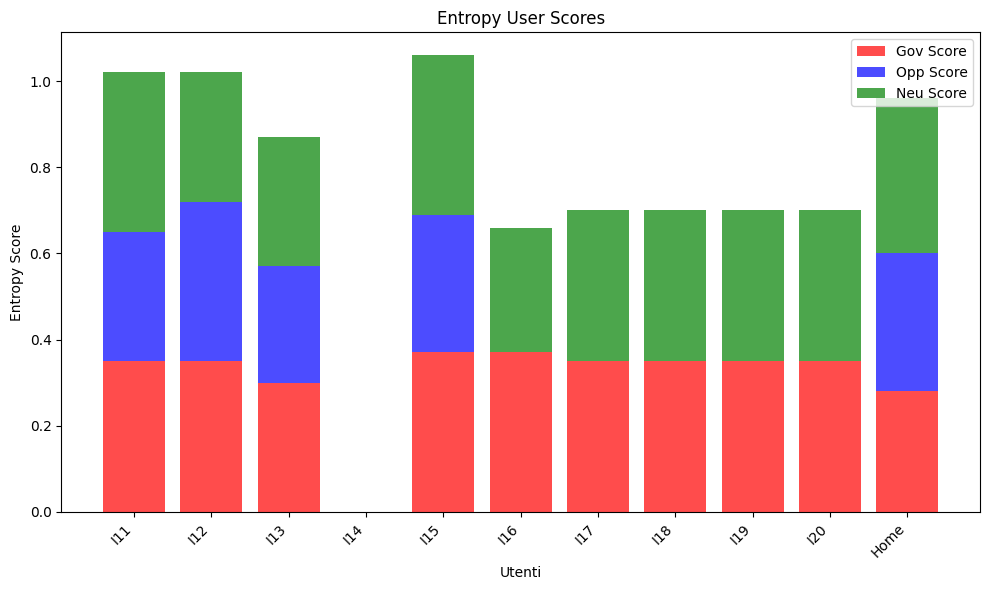

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Dati degli "Entropy User Scores" per "gov score," "opp score," e "neu score" degli utenti
gov_score = [0.35, 0.35, 0.3, 0, 0.37, 0.37, 0.35, 0.35, 0.35, 0.35, 0.28]
opp_score = [0.3, 0.37, 0.27, 0, 0.32, 0, 0, 0, 0, 0, 0.32]
neu_score = [0.37, 0.3, 0.3, 0, 0.37, 0.29, 0.35, 0.35, 0.35, 0.35, 0.36]
users = [f'I{i+11}' for i in range(len(gov_score))]
users[-1] = 'Home'

# Creazione del grafico a barre empilato
plt.figure(figsize=(10, 6))

plt.bar(users, gov_score, label='Gov Score', color='r', alpha=0.7)
plt.bar(users, opp_score, label='Opp Score', color='b', alpha=0.7, bottom=gov_score)
plt.bar(users, neu_score, label='Neu Score', color='g', alpha=0.7, bottom=np.array(gov_score) + np.array(opp_score))

plt.title('Entropy User Scores')
plt.xlabel('Utenti')
plt.ylabel('Entropy Score')
plt.legend()

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


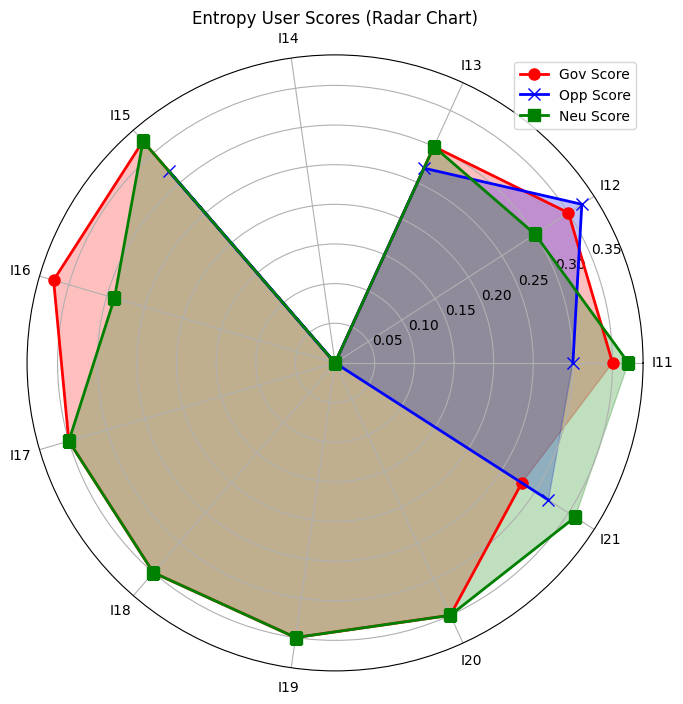

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Dati degli "Entropy User Scores" per "gov score," "opp score," e "neu score" degli utenti
gov_score = [0.35, 0.35, 0.3, 0, 0.37, 0.37, 0.35, 0.35, 0.35, 0.35, 0.28]
opp_score = [0.3, 0.37, 0.27, 0, 0.32, 0, 0, 0, 0, 0, 0.32]
neu_score = [0.37, 0.3, 0.3, 0, 0.37, 0.29, 0.35, 0.35, 0.35, 0.35, 0.36]
users = [f'I{i+11}' for i in range(len(gov_score))]

# Creazione di un grafico a radar
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Angoli per ciascun utente
angles = np.linspace(0, 2 * np.pi, len(users), endpoint=False).tolist()

# Plot dei punteggi per "gov score"
ax.plot(angles, gov_score, label='Gov Score', linewidth=2, linestyle='solid', color='r', marker='o', markersize=8)
ax.fill(angles, gov_score, alpha=0.25, color='r')

# Plot dei punteggi per "opp score"
ax.plot(angles, opp_score, label='Opp Score', linewidth=2, linestyle='solid', color='b', marker='x', markersize=8)
ax.fill(angles, opp_score, alpha=0.25, color='b')

# Plot dei punteggi per "neu score"
ax.plot(angles, neu_score, label='Neu Score', linewidth=2, linestyle='solid', color='g', marker='s', markersize=8)
ax.fill(angles, neu_score, alpha=0.25, color='g')

plt.xticks(angles, users, ha="center", rotation=-30)

plt.title('Entropy User Scores (Radar Chart)')
plt.legend()
plt.show()


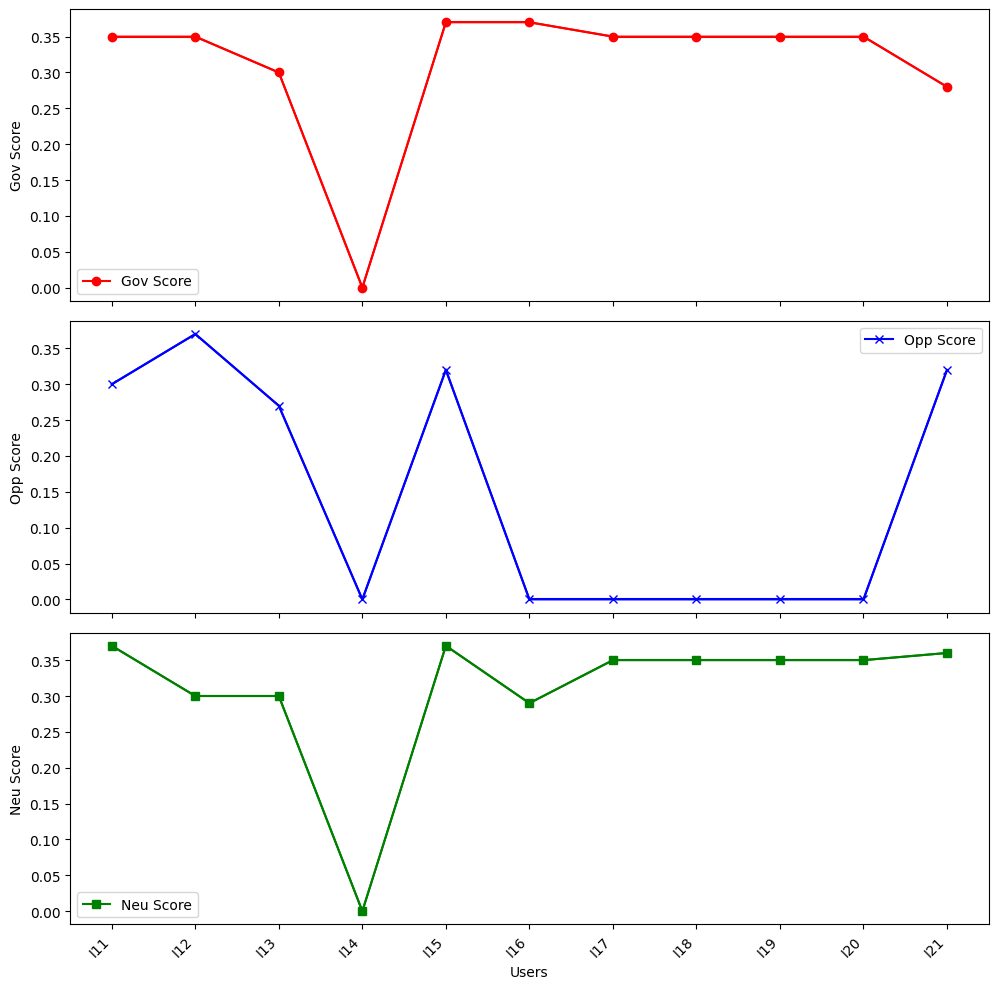

In [42]:
import matplotlib.pyplot as plt

# Dati degli "Entropy User Scores" per "gov score," "opp score," e "neu score" degli utenti
gov_score = [0.35, 0.35, 0.3, 0, 0.37, 0.37, 0.35, 0.35, 0.35, 0.35, 0.28]
opp_score = [0.3, 0.37, 0.27, 0, 0.32, 0, 0, 0, 0, 0, 0.32]
neu_score = [0.37, 0.3, 0.3, 0, 0.37, 0.29, 0.35, 0.35, 0.35, 0.35, 0.36]
users = [f'I{i+11}' for i in range(len(gov_score))]

# Creazione dei tre subplot
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Plot per "gov score"
axes[0].plot(users, gov_score, color='r', label='Gov Score', marker='o')
for i in range(len(users) - 1):
    axes[0].plot([users[i], users[i+1]], [gov_score[i], gov_score[i+1]], color='r')
axes[0].set_ylabel('Gov Score')
axes[0].legend()

# Plot per "opp score"
axes[1].plot(users, opp_score, color='b', label='Opp Score', marker='x')
for i in range(len(users) - 1):
    axes[1].plot([users[i], users[i+1]], [opp_score[i], opp_score[i+1]], color='b')
axes[1].set_ylabel('Opp Score')
axes[1].legend()

# Plot per "neu score"
axes[2].plot(users, neu_score, color='g', label='Neu Score', marker='s')
for i in range(len(users) - 1):
    axes[2].plot([users[i], users[i+1]], [neu_score[i], neu_score[i+1]], color='g')
axes[2].set_ylabel('Neu Score')
axes[2].legend()

plt.xlabel('Users')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


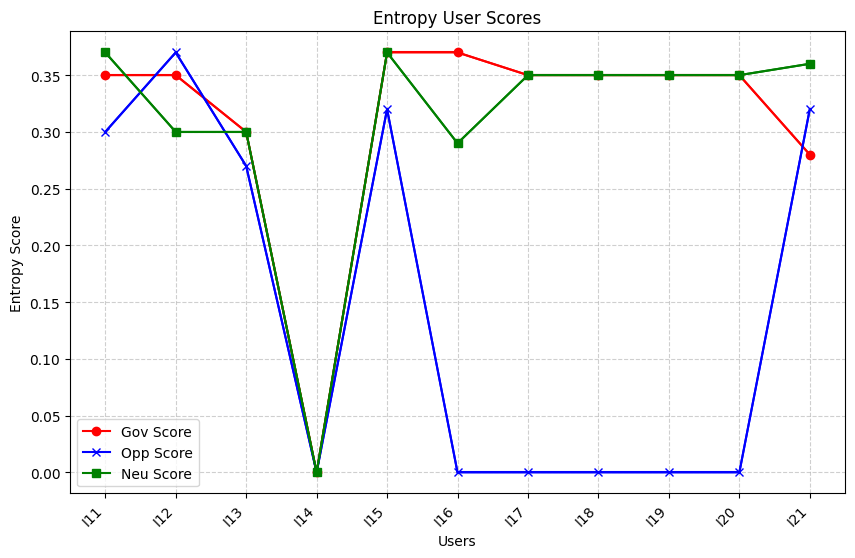

In [41]:
import matplotlib.pyplot as plt

# Dati degli "Entropy User Scores" per "gov score," "opp score," e "neu score" degli utenti
gov_score = [0.35, 0.35, 0.3, 0, 0.37, 0.37, 0.35, 0.35, 0.35, 0.35, 0.28]
opp_score = [0.3, 0.37, 0.27, 0, 0.32, 0, 0, 0, 0, 0, 0.32]
neu_score = [0.37, 0.3, 0.3, 0, 0.37, 0.29, 0.35, 0.35, 0.35, 0.35, 0.36]
users = [f'I{i+11}' for i in range(len(gov_score))]

# Creazione del multiline plot
plt.figure(figsize=(10, 6))

# Plot per "gov score"
plt.plot(users, gov_score, color='r', label='Gov Score', marker='o')
for i in range(len(users) - 1):
    plt.plot([users[i], users[i+1]], [gov_score[i], gov_score[i+1]], color='r')

# Plot per "opp score"
plt.plot(users, opp_score, color='b', label='Opp Score', marker='x')
for i in range(len(users) - 1):
    plt.plot([users[i], users[i+1]], [opp_score[i], opp_score[i+1]], color='b')

# Plot per "neu score"
plt.plot(users, neu_score, color='g', label='Neu Score', marker='s')
for i in range(len(users) - 1):
    plt.plot([users[i], users[i+1]], [neu_score[i], neu_score[i+1]], color='g')

plt.title('Entropy User Scores')
plt.xlabel('Users')
plt.ylabel('Entropy Score')
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()
